<p style = "text-align: centro">
<a href = "https://skills.network" target = "_ en blanco">
<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/sn_web_lightmode.png" width = "300" alt = "Logotipo de red de habilidades">
</a>
</p>


# Análisis de datos exploratorios


Se necesita tiempo estimado: ** 30 ** minutos


## Objetivos

Después de completar este laboratorio, podrá:

* Explorar características o características para predecir el precio del automóvil
* Analizar patrones y ejecutar análisis estadísticos descriptivos
* Datos de grupo basados ​​en parámetros identificados y crear tablas de pivote
* Identificar el efecto de los atributos independientes en el precio de los automóviles

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#import_data">Import Data from Module</a></li>
    <li><a href="#pattern_visualization">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="#discriptive_statistics">Descriptive Statistical Analysis</a></li>
    <li><a href="#basic_grouping">Basics of Grouping</a></li>
    <li><a href="#correlation_causation">Correlation and Causation</a></li>
</ol>

</div>
 
<hr>


<h3>What are the main characteristics that have the most impact on the car price?</h3>


<h2 id="import_data">1. Import Data from Module 2</h2>


<h4>Setup</h4>


Import libraries: 


In [ ]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y

In [1]:
import pandas as pd
import numpy as np

Load the data and store it in dataframe `df`:


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage">HERE</a> for free storage.


In [2]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [7]:
from dataclasses import dataclass

@dataclass
class A:
    symboling: str = "symboling"
    normalized_losses: str = "normalized-losses"
    make: str = "make"
    aspiration: str = "aspiration"
    num_of_doors: str = "num-of-doors"
    body_style: str = "body-style"
    drive_wheels: str = "drive-wheels"
    engine_location: str = "engine-location"
    wheel_base: str = "wheel-base"
    length: str = "length"
    width: str = "width"
    height: str = "height"
    curb_weight: str = "curb-weight"
    engine_type: str = "engine-type"
    num_of_cylinders: str = "num-of-cylinders"
    engine_size: str = "engine-size"
    fuel_system: str = "fuel-system"
    bore: str = "bore"
    stroke: str = "stroke"
    compression_ratio: str = "compression-ratio"
    horsepower: str = "horsepower"
    peak_rpm: str = "peak-rpm"
    city_mpg: str = "city-mpg"
    highway_mpg: str = "highway-mpg"
    price: str = "price"
    city_L_per_100km: str = "city-L/100km"
    horsepower_binned: str = "horsepower-binned"
    diesel: str = "diesel"
    gas: str = "gas"


<H2 id = "Pattern_Visualization"> 2.Análisis de patrones de características individuales utilizando visualización </h2>

Para instalar Seborn, usamos PIP, Python Package Manager.

Importa paquetes de visualización "matplotlib" y "sayorn".No te olvides del "%matplotlib en línea" para trazar en un cuaderno Jupyter.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


<H4> ¿Cómo elegir el método de visualización correcto? </h4>
<p> Al visualizar las variables individuales, es importante comprender primero con qué tipo de variable está tratando.Esto nos ayudará a encontrar el método de visualización correcto para esa variable. </p>

In [4]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Question  #1:</h3>
<b> ¿Cuál es el tipo de datos de la columna "Peak-RPM"?</b>
</div>

In [ ]:
# Write your code below and press Shift+Enter to execute 
# float64

<details><summary>Click here for the solution</summary>

```python    
float64
```

</details>


Por ejemplo, podemos calcular la correlación entre las variables de tipo "int64" o "float64" utilizando el método "corr":

In [20]:
df_Numeric = df.select_dtypes(include=['int','float'])
cosa = df_Numeric.corr()
cosa

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Los elementos diagonales son siempre uno;Estudiaremos la correlación con mayor precisión de la correlación de Pearson en profundidad al final del cuaderno.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3> Question  #2: </h3>

<p>Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.</p>
<p> Sugerencia: si desea seleccionar esas columnas, use la siguiente sintaxis:df[['bore','stroke','compression-ratio','horsepower']]</p>
</div>


In [21]:
# Write your code below and press Shift+Enter to execute 

df[[A.bore, A.stroke, A.compression_ratio, A.horsepower]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<details><summary>Click here for the solution</summary>

```python
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()
```

</details>


<h2> variables numéricas continuas: </h2>

<p> Las variables numéricas continuas son variables que pueden contener cualquier valor dentro de algún rango.Pueden ser de tipo "int64" o "float64".Una excelente manera de visualizar estas variables es mediante el uso de diagramas de dispersión con líneas ajustadas. </p>

<p> Para comenzar a comprender la relación (lineal) entre una variable individual y el precio, podemos usar "Regplot" que traza el plan de dispersión más la línea de regresión ajustada para los datos.Esto será útil más adelante para visualizar el ajuste del modelo de regresión lineal simple también.</p>

Veamos varios ejemplos de diferentes relaciones lineales:

<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "engine-size" and "price".


(0.0, 53035.82984821701)

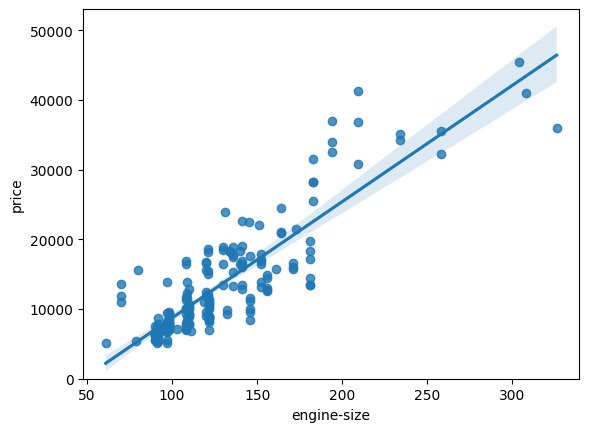

In [22]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p> A medida que aumenta el tamaño del motor, el precio sube: esto indica una correlación directa positiva entre estas dos variables.El tamaño del motor parece un predictor bastante bueno del precio, ya que la línea de regresión es casi una línea diagonal perfecta. </p>

Podemos examinar la correlación entre el 'tamaño del motor' y el 'precio' y ver que es aproximadamente 0.87.

In [23]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


La carretera MPG es una variable predictor potencial del precio.Encontremos el diagrama de dispersión de "Highway-MPG" y "Price".

<Axes: xlabel='highway-mpg', ylabel='price'>

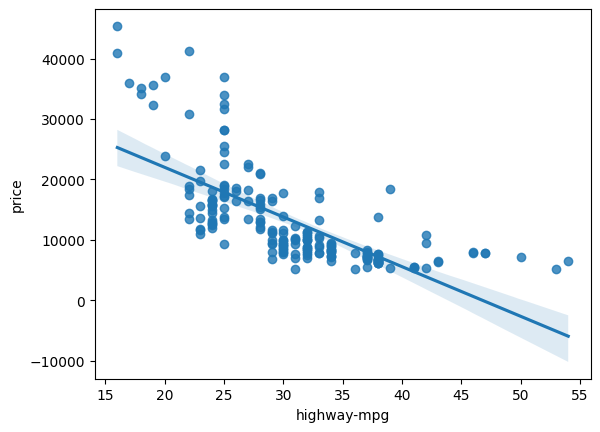

In [24]:
sns.regplot(x="highway-mpg", y="price", data=df)

<p> A medida que aumenta la autopista-MPG, el precio disminuye: esto indica una relación inversa/negativa entre estas dos variables.La autopista MPG podría ser un predictor del precio. </p>

Podemos examinar la correlación entre 'Highway -MPG' y 'Price' y ver que es aproximadamente -0.704.

In [25]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<h3>Weak Linear Relationship</h3>



Veamos si "Peak-RPM" es una variable predictor de "precio".

<Axes: xlabel='peak-rpm', ylabel='price'>

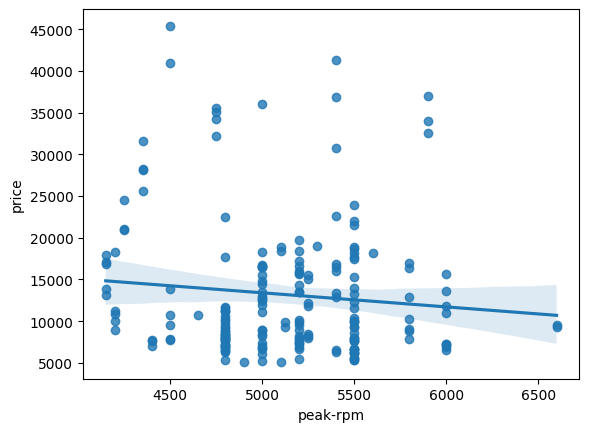

In [26]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p> rpm pico no parece un buen predictor del precio ya que la línea de regresión está cerca de horizontal.Además, los puntos de datos están muy dispersos y lejos de la línea ajustada, que muestran mucha variabilidad.Por lo tanto, no es una variable confiable. </p>

Podemos examinar la correlación entre 'Peak -RPM' y 'Price' y ver que es aproximadamente -0.101616.

In [27]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>

<p>Find the correlation  between x="stroke" and y="price".</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[["stroke","price"]].  </p>
</div>


In [28]:
# Write your code below and press Shift+Enter to execute
df[[A.stroke,A.price]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<details><summary>Click here for the solution</summary>

```python

#The correlation is 0.0823, the non-diagonal elements of the table.

df[["stroke","price"]].corr()

```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  3 b):</h1>

<p>Given the correlation results between "price" and "stroke", do you expect a linear relationship?</p> 
<p>Verify your results using the function "regplot()".</p>
</div>


<Axes: xlabel='stroke', ylabel='price'>

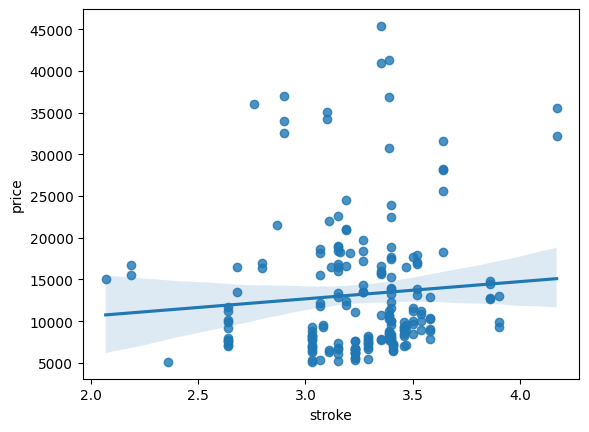

In [29]:
# Write your code below and press Shift+Enter to execute 
sns.regplot(x=A.stroke, y=A.price, data=df)

<details><summary>Click here for the solution</summary>

```python

#There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. We can see this using "regplot" to demonstrate this.

#Code: 
sns.regplot(x="stroke", y="price", data=df)

```

</details>


<h3> Variables categóricas </h3>

<p> Estas son variables que describen una 'característica' de una unidad de datos y se seleccionan de un pequeño grupo de categorías.Las variables categóricas pueden tener el tipo "objeto" o "int64".Una buena manera de visualizar variables categóricas es mediante el uso de diagramas de caja. </p>

Veamos la relación entre "estilo cuerpo" y "precio".

<Axes: xlabel='body-style', ylabel='price'>

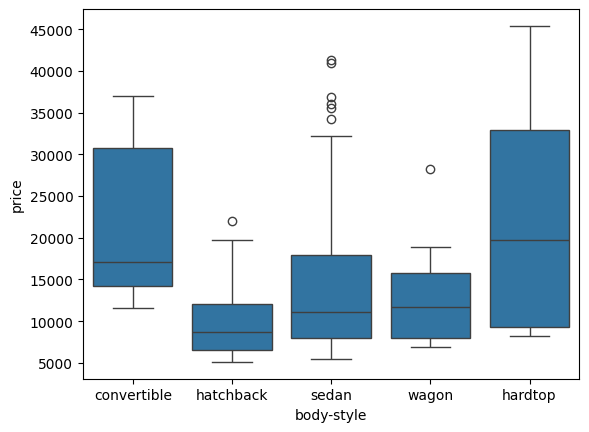

In [30]:
sns.boxplot(x="body-style", y="price", data=df)

<p> Vemos que las distribuciones de precio entre las diferentes categorías de estilo corporal tienen una superposición significativa, por lo que el estilo corporal no sería un buen predictor del precio.Examinemos la "ubicación del motor" del motor y el "precio": </p>

<Axes: xlabel='engine-location', ylabel='price'>

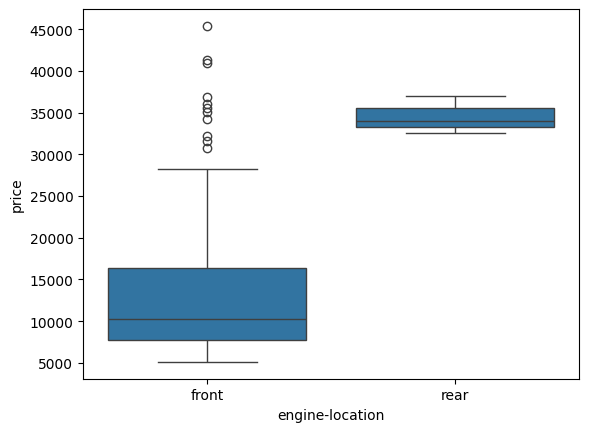

In [31]:
sns.boxplot(x="engine-location", y="price", data=df)

<P> Aquí vemos que la distribución del precio entre estas dos categorías de ubicación de motor, delantera y trasera, es lo suficientemente distinta como para tomar el ubicación del motor como un buen predictor potencial del precio. </p>

 Let's examine "drive-wheels" and "price".


<Axes: xlabel='drive-wheels', ylabel='price'>

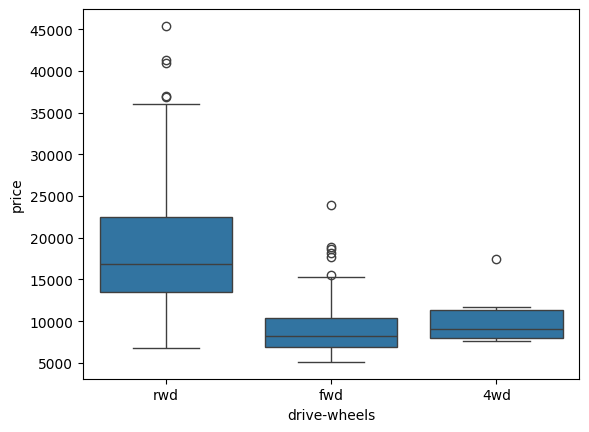

In [32]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

<p> Aquí vemos que la distribución del precio entre las diferentes categorías de ruedas de transmisión difiere.Como tal, las ruedas de transmisión podrían ser un predictor del precio. </p>

<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p> Primero echemos un vistazo a las variables utilizando un método de descripción. </p>

<p> La función <b> describir </b> calcula automáticamente estadísticas básicas para todas las variables continuas.Cualquier valor de NAN se omite automáticamente en estas estadísticas. </p>

Esto mostrará:
<ul>
<li> El recuento de esa variable </li>
<li> La media </li>
<li> La desviación estándar (STD) </li>
<li> El valor mínimo </li>
<li> El IQR (rango intercuartil: 25%, 50%y 75%) </li>
<li> El valor máximo </li>
<ul>

 We can apply the method "describe" as follows:


In [33]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


La configuración predeterminada de "describir" omita las variables del objeto tipo.Podemos aplicar el método "describir" en las variables de tipo 'objeto' de la siguiente manera:

In [34]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


<h3>Value Counts</h3>


<p> Value Counts es una buena forma de comprender cuántas unidades de cada característica/variable tenemos.Podemos aplicar el método "value_counts" en la columna "volantes de transmisión".No olvide el método "value_counts" solo funciona en la serie Pandas, no los marcos de datos de Pandas.Como resultado, solo incluimos un soporte <código> DF ['WHEELS DE DISPARACIÓN'] </code>, no dos soportes <code> df [['Drive-Wheels']] </code>. </p>

In [35]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

Podemos convertir la serie a un marcado de datos de la siguiente manera:

In [36]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Repitemos los pasos anteriores, pero guarde los resultados en el DataFrame "Drive_Wheels_Counts" y cambie el nombre de la columna 'Wheels' Wheels 'a' value_counts '.

In [40]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


 Now let's rename the index to 'drive-wheels':


In [41]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Podemos repetir el proceso anterior para la variable 'ubicación del motor'.

In [42]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


<p> Después de examinar los recuentos de valor de la ubicación del motor, vemos que la ubicación del motor no sería una buena variable predictor para el precio.Esto se debe a que solo tenemos tres autos con un motor trasero y 198 con un motor en la parte delantera, por lo que este resultado está sesgado.Por lo tanto, no podemos sacar conclusiones sobre la ubicación del motor. </p>

<h2 id="basic_grouping">4. Basics of Grouping</h2>


<P> El método "Groupby" agrupa datos por diferentes categorías.Los datos se agrupan en función de una o varias variables, y el análisis se realiza en los grupos individuales. </p>

<p> Por ejemplo, agrupemos por la variable "ruedas de transmisión".Vemos que hay 3 categorías diferentes de ruedas de transmisión. </p>

In [43]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p> Si queremos saber, en promedio, qué tipo de rueda de transmisión es más valiosa, podemos agrupar las "ruedas de transmisión" y luego promediarlas. </p>

<p> Podemos seleccionar las columnas 'ruedas de transmisión', 'estilo cuerpo' y 'precio', luego asignarlo a la variable "df_group_one". </p>

In [44]:
df_group_one = df[['drive-wheels','body-style','price']]

In [50]:
df[A.drive_wheels].head()

0    rwd
1    rwd
2    rwd
3    fwd
4    4wd
Name: drive-wheels, dtype: object

In [52]:
df[['drive-wheels','body-style']].dtypes

drive-wheels    object
body-style      object
dtype: object

Luego podemos calcular el precio promedio para cada una de las diferentes categorías de datos.

In [60]:
# grouping results
df_group_one = df[['drive-wheels','price']]
df_group = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p> A partir de nuestros datos, parece que los vehículos con tracción trasera son, en promedio, los más caros, mientras que las 4 ruedas y las ruedas delanteras tienen aproximadamente el mismo precio. </p>

<p> También puede agrupar por múltiples variables.Por ejemplo, agrupemos tanto por 'volantes' como 'estilo cuerpo'.Esto agrupa el marco de datos mediante la combinación única de 'ruedas de transmisión' y 'estilo cuerpo'.Podemos almacenar los resultados en la variable 'Grouped_Test1'. </p>

In [59]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p> Estos datos agrupados son mucho más fáciles de visualizar cuando se convierte en una tabla de pivote.Una tabla de pivote es como una hoja de cálculo de Excel, con una variable a lo largo de la columna y otra a lo largo de la fila.Podemos convertir el marco de datos en una tabla de pivote utilizando el método "pivote" para crear una tabla de pivote a partir de los grupos. </p>

<p> En este caso, dejaremos la variable de ruedas de transmisión como las filas de la tabla, y el estilo de cuerpo de pivote para convertirnos en las columnas de la tabla: </p>

In [61]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p> A menudo, no tendremos datos para algunas de las células dinámicas.Podemos llenar estas celdas faltantes con el valor 0, pero cualquier otro valor también podría usarse.Debe mencionarse que los datos faltantes son un tema bastante complejo y es un curso completo por sí solo. </p>.

In [62]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "price" of each car based on "body-style".</p>
</div>


In [65]:
# Write your code below and press Shift+Enter to execute 

sub1=df[[A.body_style, A.price]]

grouped_test12= sub1.groupby([A.body_style],as_index=False).mean()
grouped_test12

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<details><summary>Click here for the solution</summary>

```python
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

```

</details>


Si no importó "Pyplot", hagámoslo nuevamente.

In [66]:
import matplotlib.pyplot as plt


<h4> Variables: ruedas de transmisión y estilo de cuerpo versus precio </h4>

Usemos un mapa de calor para visualizar la relación entre el estilo del cuerpo frente al precio.

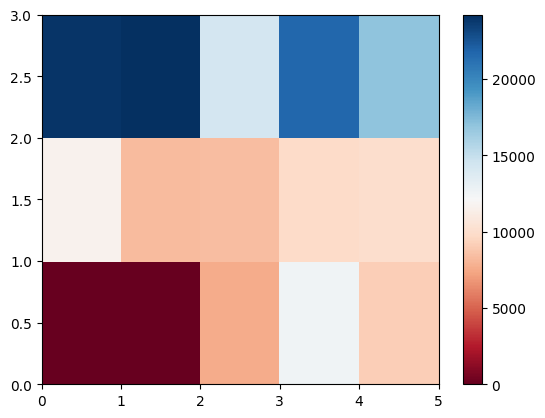

In [67]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p> El mapa de calor traza la variable objetivo (precio) proporcional al color con respecto a las variables 'rueda de transmisión' y 'estilo cuerpo' en el eje vertical y horizontal, respectivamente.Esto nos permite visualizar cómo el precio está relacionado con 'volante' y 'estilo cuerpo'. </p>.

<p> Las etiquetas predeterminadas no nos transmiten información útil.Cambiemos eso: </p>

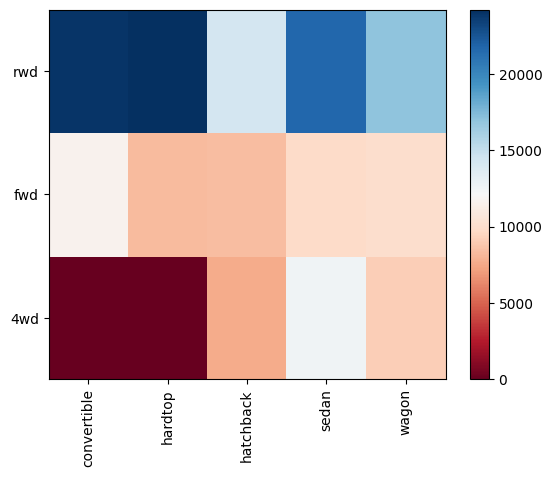

In [68]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p> La visualización es muy importante en la ciencia de datos, y los paquetes de visualización de Python proporcionan una gran libertad.Vamos a más profundos en un curso separado de visualizaciones de Python. </p>

<p> La pregunta principal que queremos responder en este módulo es: "¿Cuáles son las características principales que tienen el mayor impacto en el precio del automóvil?". </p>

<p> Para obtener una mejor medida de las características importantes, observamos la correlación de estas variables con el precio del automóvil.En otras palabras: ¿Cómo depende el precio del automóvil de esta variable? </p>

<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p> <b> Correlación </b>: una medida de la extensión de la interdependencia entre variables. </p>

<p> <b> causa </b>: la relación entre causa y efecto entre dos variables. </p>

<p> Es importante saber la diferencia entre estos dos.La correlación no implica causalidad.Determinar la correlación es mucho más simple, la causalidad determinante, ya que la causalidad puede requerir una experimentación independiente. </p>

<p> <b> Correlación de Pearson </b> </p>
<p> La correlación de Pearson mide la dependencia lineal entre dos variables x e y. </p>
<p> El coeficiente resultante es un valor entre -1 y 1 inclusive, donde: </p>
<ul>
<li> <b> 1 </b>: correlación lineal positiva perfecta. </li>
<li> <b> 0 </b>: sin correlación lineal, las dos variables probablemente no se afectan entre sí. </li>
<li> <b> -1 </b>: correlación lineal negativa perfecta. </li>
</ul>

<p> La correlación de Pearson es el método predeterminado de la función "Corr".Como antes, podemos calcular la correlación de Pearson de las variables 'int64' o 'float64'. </p>

In [ ]:
df.corr()

A veces nos gustaría saber lo significativo de la estimación de correlación.

<b> p-valor </b>
<p> ¿Qué es este valor p?El valor p es el valor de probabilidad de que la correlación entre estas dos variables es estadísticamente significativa.Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que estamos un 95% seguros de que la correlación entre las variables es significativa. </p>

Por convención, cuando el
<ul>
<li> El valor p es $ <$ 0.001: Decimos que hay evidencia sólida de que la correlación es significativa. </li>
<li> El valor p es de $ <$ 0.05: hay evidencia moderada de que la correlación es significativa. </li>
<li> El valor p es $ <$ 0.1: hay evidencia débil de que la correlación es significativa. </li>
<li> El valor p es de $> $ 0.1: no hay evidencia de que la correlación sea significativa. </li>
</ul>

Podemos obtener esta información utilizando el módulo "Estadísticas" en la biblioteca "SciPy".

In [69]:
from scipy import stats

<h3>Wheel-Base vs. Price</h3>


Calculemos el coeficiente de correlación de Pearson y el valor p de 'Wheel-Base' y 'Price'.

In [72]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732847e-20


<h4> Conclusión: </h4>
<p> Dado que el valor p es de $ <$ 0.001, la correlación entre la base de la rueda y el precio es estadísticamente significativa, aunque la relación lineal no es extremadamente fuerte (~ 0.585). </p>.

<h3>Horsepower vs. Price</h3>


 Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.


In [73]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P =  6.369057428259638e-48


<h4> Conclusión: </h4>

<p> Dado que el valor p es de $ <$ 0.001, la correlación entre la potencia y el precio es estadísticamente significativa, y la relación lineal es bastante fuerte (~ 0.809, cerca de 1). </p>

<h3>Length vs. Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.


In [74]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466158899e-30


<h4> Conclusión: </h4>
<p> Dado que el valor p es de $ <$ 0.001, la correlación entre la longitud y el precio es estadísticamente significativa, y la relación lineal es moderadamente fuerte (~ 0.691). </p>

<h3>Width vs. Price</h3>


 Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':


In [75]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481227e-38


#### Conclusión:

Dado que el valor p es <0.001, la correlación entre el ancho y el precio es estadísticamente significativa, y la relación lineal es bastante fuerte (~ 0.751).

### Curb-Weight vs. Price


 Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':


In [76]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702845  with a P-value of P =  2.189577238893924e-53


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h3>Engine-Size vs. Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':


In [77]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.26549162219869e-64


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h3>Bore vs. Price</h3>


 Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':


In [78]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P =   8.049189483935274e-17


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>


 We can relate the process for each 'city-mpg'  and 'highway-mpg':


<h3>City-mpg vs. Price</h3>


In [79]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844679  with a P-value of P =  2.3211320655675065e-29


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>


<h3>Highway-mpg vs. Price</h3>


In [80]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P =  1.7495471144476634e-31


<Axes: xlabel='horsepower-binned', ylabel='price'>

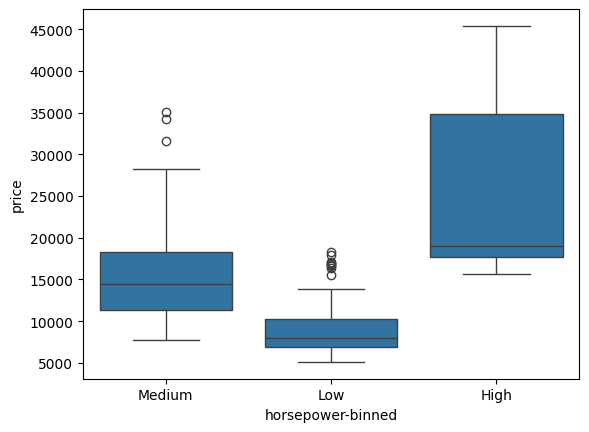

In [99]:
sns.boxplot(x=A.horsepower_binned, y="price", data=df)

In [83]:
df.describe(include='object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [100]:
df[A.horsepower_binned].value_counts()


horsepower-binned
Low       115
Medium     62
High       23
Name: count, dtype: int64

In [102]:
col_eval = [A.length, A.width, A.curb_weight, A.engine_size, A.horsepower,A.city_mpg, A.highway_mpg, A.wheel_base,A.bore]
for col in col_eval:
    pearson_coef, p_value = stats.pearsonr(df[col], df['price'])
    print( col , "::: ", pearson_coef, " with a P-value of P = ", p_value ) 

length :::  0.690628380448364  with a P-value of P =  8.016477466158899e-30
width :::  0.7512653440522674  with a P-value of P =  9.200335510481227e-38
curb-weight :::  0.8344145257702845  with a P-value of P =  2.189577238893924e-53
engine-size :::  0.8723351674455185  with a P-value of P =  9.26549162219869e-64
horsepower :::  0.809574567003656  with a P-value of P =  6.369057428259638e-48
city-mpg :::  -0.6865710067844679  with a P-value of P =  2.3211320655675065e-29
highway-mpg :::  -0.7046922650589529  with a P-value of P =  1.7495471144476634e-31
wheel-base :::  0.5846418222655081  with a P-value of P =  8.076488270732847e-20
bore :::  0.5431553832626603  with a P-value of P =  8.049189483935274e-17


#### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.


<h3>Conclusion: Important Variables</h3>


<p> Ahora tenemos una mejor idea de cómo se ven nuestros datos y qué variables son importantes para tener en cuenta al predecir el precio del automóvil.Lo hemos reducido a las siguientes variables: </p>

Variables numéricas continuas:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p> A medida que ahora pasamos a la construcción de modelos de aprendizaje automático para automatizar nuestro análisis, alimentar el modelo con variables que afectan significativamente nuestra variable objetivo mejorará el rendimiento de predicción de nuestro modelo. </p>


### Thank you for completing this lab!


## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>


### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a>

<a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

<a href="https://www.coursera.org/instructor/~129186572/" target="_blank" >Abhishek Gagneja </a>

## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2023-09-28 | 2.2 | Abhishek Gagneja | Updated instructions |
| 2020-10-30  | 2.1  | Lakshmi |  changed URL of csv  |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab  |



<hr>

## <h3 align="center"> © IBM Corporation 2023. All rights reserved. <h3/>
